# Linear Regression

In [68]:
import numpy as np
class LinearRegression:
  def __init__(self):
    self.weights = None
    
  def predict(self, X):
    return X @ self.weights[1:] + self.weights[0]
  
  def train(self, X, y):
    X = np.c_[np.ones(X.shape[0]), X]
    self.weights = np.linalg.inv(X.T @ X) @ X.T @ y
    return self.weights

Mean Squared Error: 104.20222653187022


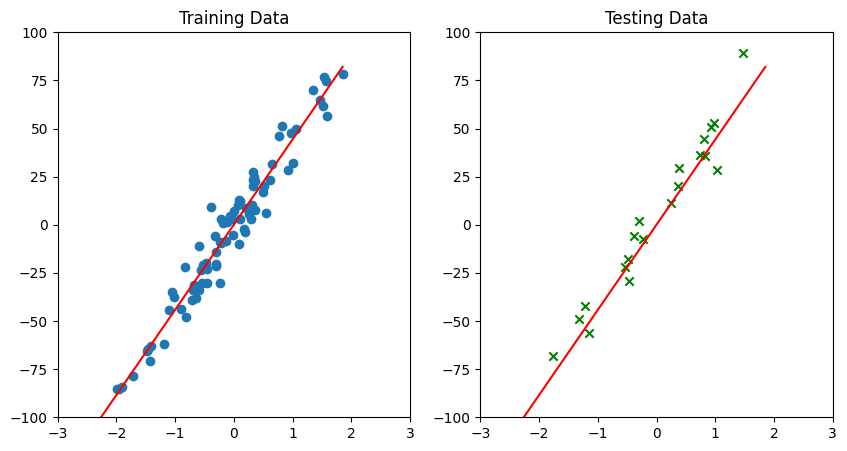

In [69]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as SklearnLinearRegression

X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))

ax[0].scatter(X_train, y_train, label='Training Data')
ax[0].set_title('Training Data')
ax[0].set_xlim(-3, 3)
ax[0].set_ylim(-100, 100)

linear_regression = LinearRegression()
weights = linear_regression.train(X_train, y_train)

x_plot = np.linspace(X_train[:,0].min(), X_train[:,0].max(), 100)
y_plot = weights[0] + weights[1] * x_plot
ax[0].plot(x_plot, y_plot, color='red', label='Regression Line')




ax[1].scatter(X_test, y_test, color='green', label='Testing Data', marker='x')
ax[1].set_title('Testing Data')
ax[1].set_xlim(-3, 3)
ax[1].set_ylim(-100, 100)
ax[1].plot(x_plot, y_plot, color='red', label='Regression Line')

from sklearn.metrics import mean_squared_error
y_pred = linear_regression.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
